3    1129
4     529
2     189
5     137
6      84
Name: word_count, dtype: int64

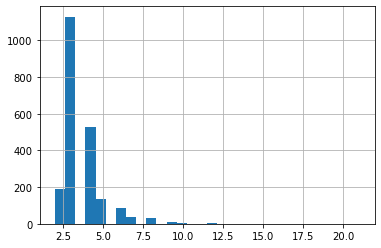

In [24]:
# data['new_column'] = data['column'].apply(method)
# data['new_column'] = data.apply(method, axis=1) axis = 1 - передает строку 0 - передает колонку

import pandas as pd

stats = pd.read_excel('ad_campaigns.xlsx')
stats.head()

stats['word_count'] = stats.apply(lambda x: len(x['Фраза (с минус-словами)'].split(' ')), axis=1)
stats['word_count'].hist(bins=30)
stats['word_count'].value_counts().head()


In [27]:
def power_up(row, n):
    return row['Продуктивность'] ** n

stats['power_up'] = stats.apply(power_up, n=2, axis=1)
stats.head()

Название группы                            Фраза (с минус-словами)  \
0  мрт менделеевская                              "!мрт !менделеевская"   
1            мрт цао                                "мрт менделеевская"   
2            мрт цао  мрт менделеевская -головы -позвоночника -сдела...   
3            мрт цао                                        "!мрт !цао"   
4            мрт сао                                          "мрт цао"   

   Продуктивность  ID объявления                      Заголовок  \
0             4.5     2101704995  МРТ на Менделеевской от 2000₽   
1             4.5     2101704995  МРТ на Менделеевской от 2000₽   
2             7.4     2101704995  МРТ на Менделеевской от 2000₽   
3             5.0     2101704999   МРТ в ЦАО от 2000₽. Звоните!   
4             5.0     2101704999   МРТ в ЦАО от 2000₽. Звоните!   

                                               Текст  \
0  24 часа. МРТ в день обращения. Консультация вр...   
1  24 часа. МРТ в день обращения. Консультация вр...   
2  24 часа. МРТ в день обращения. Консультация вр...   
3  24 часа. МРТ в день обращения. Консультация вр...   
4  24 часа. МРТ в день обращения. Консультация вр...   

                                              Ссылка  word_count  power_up  
0  https://awesome-site.ru/?utm_source=yandex&utm...           2     20.25  
1  https://awesome-site.ru/?utm_source=yandex&utm...           2     20.25  
2  https://awesome-site.ru/?utm_source=yandex&utm...           6     54.76  
3  https://awesome-site.ru/?utm_source=yandex&utm...           2     25.00  
4  https://awesome-site.ru/?utm_source=yandex&utm...           2     25.00

In [20]:
import pandas as pd

stats = pd.read_excel('ad_campaigns.xlsx')
t = stats[~((stats['Название группы'].str.contains('мрт')) & (stats['Текст'].str.contains('24')))]
len(t)

39

In [72]:
import pandas as pd


df = pd.DataFrame({'order_id': [1, 2, 3, 4, 5],
                   'country': ['Россия', 'Китай', 'Китай', 'Россия', 'Россия'],
                   'category': ['Электроника', 'Авто', 'Электроника', 'Авто', 'Авто'],
                   'amount': [100, 80, 90, 140, 90]
                   })

df_russia = df[df['country'].str.contains('Россия')]
df_china = df[df['country'].str.contains('Китай')]

print('df_russia amount average', df_russia['amount'].mean())
print('df_china amount average', df_china['amount'].mean())

rus = df_russia.sort_values(by=['amount'], ascending=False)
chin = df_china.sort_values(by=['amount'], ascending=False)
print(list(rus['amount'])[0] - list(rus['amount'])[-1])
print(list(chin['amount'])[0] - list(chin['amount'])[-1])

print(df_russia.amount.max() - df_russia.amount.min())
print(df_china.amount.max() - df_china.amount.min())

df_russia amount average 110.0
df_china amount average 85.0
50
10
50
10


In [73]:
stats.groupby('campaign').agg(['min', 'max'])['effect'].head()

results = stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})
results.head()

# stats.groupby('campaign').count().reset_index().head() # пересчитать индекс если вместо  0 1.. другой и съехала таблица

KeyError: 'campaign'

In [92]:
%%time

data_list = set(range(100000))

for _ in range(10**8):
    if 50000 in data_list:
        pass


Wall time: 6.46 s
